In [1]:
import matplotlib
matplotlib.__version__

'2.2.3'

In [2]:
import PIL
PIL.__version__

'5.2.0'

In [3]:
import scipy
scipy.__version__

'1.2.1'

In [17]:
from matplotlib import image as img

In [20]:
image = img.imread('C:/Users/Rita/Desktop/testImage.jpg')

In [45]:
image.shape

(200, 200, 3)

In [52]:
from matplotlib import pyplot as pyplot

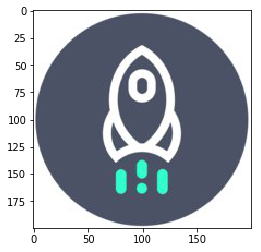

In [54]:
pyplot.imshow(image)

In [47]:
#convert the matrix stored in image into three individual lists, each of length 40,000 (200 x 200).
#create three empty lists, and then loop them through each pixel of the image, appending the RGB values to r, g, and b lists.
#each list will have a length of 40,000 (200 x 200)

r = []
g = []
b = []

for line in image:
    for pixel in line:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)    

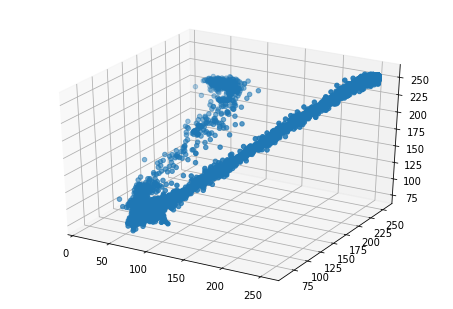

In [61]:
from mpl_toolkits.mplot3d import Axes3D
figure = pyplot.figure()
ax = Axes3D(figure)
ax.scatter(r, g, b)
pyplot.show()

In [65]:
import pandas as pd

In [71]:
df = pd.DataFrame({'red': r,
'blue': b,
'green': g})

In [72]:
from scipy.cluster.vq import whiten

In [73]:
df['scaled_red'] = whiten(df['red'])
df['scaled_blue'] = whiten(df['blue'])
df['scaled_green'] = whiten(df['green'])
df.sample(n = 10)

,red,blue,green,scaled_red,scaled_blue,scaled_green
37128,78,105,86,0.938451,1.478351,1.069103
25872,254,255,255,3.055981,3.590282,3.170015
26462,75,101,82,0.902357,1.422033,1.019377
36941,77,103,84,0.926419,1.450192,1.044240
21603,86,102,90,1.034702,1.436113,1.118829
36784,255,255,255,3.068012,3.590282,3.170015
24279,79,109,85,0.950482,1.534669,1.056672
30371,75,101,82,0.902357,1.422033,1.019377
29423,76,102,85,0.914388,1.436113,1.056672
26078,255,255,255,3.068012,3.590282,3.170015


In [74]:
from scipy.cluster.vq import kmeans
cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], 2)

In [75]:
#standardized versions of RGB values
print(cluster_centers)

[[2.94997481 3.12486116 3.5267346 ]
 [0.91851283 1.05288218 1.44787331]]


In [ ]:
colors = []
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()

for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
colors.append((
scaled_r * r_std / 255,
scaled_g * g_std / 255,
scaled_b * b_std / 255
))
pyplot.imshow([colors])
pyplot.show()